In [6]:
import numpy as np
import aeon.io.api as api
import matplotlib.pyplot as plt
import pandas as pd

[0, 3300, 6600, 9900, 13200, 16500, 19800, 23100, 26400, 29700, 33000, 36300, 39600, 42900, 46200, 49500, 52800, 56100, 59400, 62700, 66000, 69300, 72600, 75900, 79200, 82500, 85800, 89100, 92400, 95700, 99000, 102300, 105600, 108900, 112200, 115500, 118800, 122100, 125400, 128700, 132000, 135300, 138600, 141900, 145200, 148500, 151800, 155100, 158400, 161700, 165000, 168300, 171600, 174900, 178200, 181500, 184800, 188100, 191400, 194700, 198000, 201300, 204600, 207900, 211200, 214500, 217800, 221100, 224400, 227700, 231000, 234300, 237600, 240900, 244200, 247500, 250800, 254100, 257400, 260700, 264000, 267300, 270600, 273900, 277200, 280500, 283800, 287100, 290400, 293700, 297000, 300300, 303600, 306900, 310200, 313500, 316800, 320100, 323400, 326700, 330000, 333300, 336600, 339900, 343200, 346500, 349800, 353100, 356400, 359700, 363000, 366300, 369600, 372900, 376200, 379500, 382800, 386100, 389400, 392700, 396000, 399300, 402600, 405900, 409200, 412500, 415800, 419100, 422400, 42570

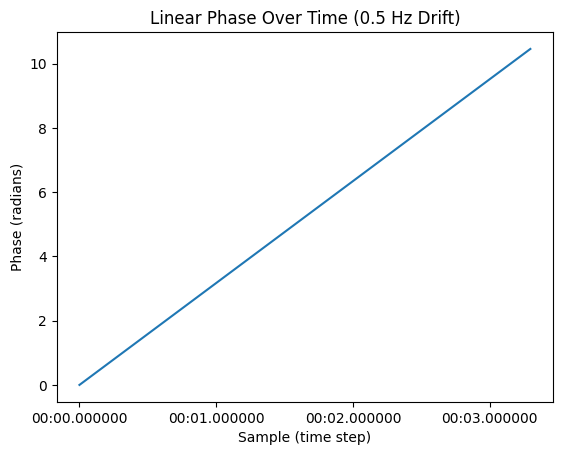

In [11]:
# create a range of regularly spaced times
n = 1000 # number of times
step = 3300 # time between each in us

sampling_rate = 300 #flow sensor sampling rate
frequency = 0.5 #desired drift frequency
m = 2 * np.pi / (sampling_rate / frequency)   #slope change per step. 2*np.pi is phase in radians

print([i for i in np.arange(0, n*step, step)])

#add harp timestamps
times = [np.datetime64(api.aeon(0)) + np.timedelta64(i, 'us') for i in np.arange(0, n*step, step)]
print(times)

# create a same sized sin vector of values
# f = 5
# amp = 200
# sin_wave = np.int16(np.sin(2 * np.pi * f * np.arange(n) / 300) * amp)

# N.B. for line above. The determinator of playback rate is Bonsai itself, not the harp timestamps in the csv file.
# Bonsai uses the timing of the flow sensor to sample from the csv playback file (approx 300Hz). Therefore the sample rate in the csv file is meaningless when loaded in Bonsai.
# Originally these HARP timestamps were kept in the csv file so one could see the original sample rate the data was acquired at.
# In practice to make a playback file at a desired frequency one needs to keep in mind that Bonsai will replay at 300Hz (flow sensor rate). Therefore to make a true 300Hz sine wave, one would need to generate a playback file in which a full sin phase completion happens every 300 samples.

#for linear increase 
# linear_values = np.int16(m * np.arange(n))
linear_values = m * np.arange(n)


#plot
# plt.plot(linear_values)

# Plot the linear phase values
plt.plot(times, linear_values)
plt.xlabel('Sample (time step)')
plt.ylabel('Phase (radians)')
plt.title('Linear Phase Over Time (0.5 Hz Drift)')
plt.show()

# plt.plot(sin_wave)

# construct into a data frame
dataframe = pd.DataFrame(linear_values, index=times)
# dataframe = pd.DataFrame(sin_wave, index=times)

dataframe.to_csv('lin_playback.csv', header=False, sep=',', lineterminator='\n')
